# 1. Iris의 세 가지 품종, 분류해볼 수 있겠어요?

scikit-learn에 내장된 예제 데이터셋의 종류를 알고 활용할 수 있다.  

scikit-learn에 내장된 분류 모델들을 학습시키고 예측해 볼 수 있다.  

모델의 성능을 평가하는 지표의 종류에 대해 이해하고, 활용 및 확인해 볼 수 있다.  

Decision Tree, XGBoost, RandomForest, 로지스틱 회귀 모델을 활용해서 간단하게 학습 및 예측해 볼 수 있다.  

데이터셋을 사용해서 스스로 분류 기초 실습을 진행할 수 있다.  

## 1-2. Iris의 세 가지 품종, 분류해 볼까요? (1) 붓꽃 분류 문제

#### petal은 꽃잎, sepal은 꽃받침이다.

우리가 쓸 패키지 : scikit-learn ,matplotlib

붓꽃 데이터가 예제 데이터로 많이 쓰이는 이유는 머신러닝에서 가장 많이 쓰이는 라이브러리 중 하나인 사이킷런(scikit-learn) 에 내장된 데이터이기 때문이기도 합니다.

#### Q2. scikit-learn이 예제로 제공하는 데이터셋 중 머신러닝 실습을 해 보기 좋은 데이터셋은 크게 Toy datasets과 Real world datasets 두 가지가 있습니다.<br>
Toy datasets와 Real world datasets에는 각각 어떤 데이터셋들을 제공하나요?

Toy datasets<br>
7.1.1. Boston house prices dataset<br>
7.1.2. Iris plants dataset<br>
7.1.3. Diabetes dataset<br>
7.1.4. Optical recognition of handwritten digits dataset<br>
7.1.5. Linnerrud dataset<br>
7.1.6. Wine recognition dataset<br>
7.1.7. Breast cancer wisconsin (diagnostic) dataset<br>

작고 간단한 자료

Real world datasets<br>
7.2.1. The Olivetti faces dataset<br>
7.2.2. The 20 newsgroups text dataset<br>
7.2.3. The Labeled Faces in the Wild face recognition dataset<br>
7.2.4. Forest covertypes<br>
7.2.5. RCV1 dataset<br>
7.2.6. Kddcup 99 dataset<br>
7.2.7. California Housing dataset<br>

비교적 복잡하고 현실 세계를 반영

저희는 이 중 Toy datasets의 iris 데이터셋을 사용할 것입니다.

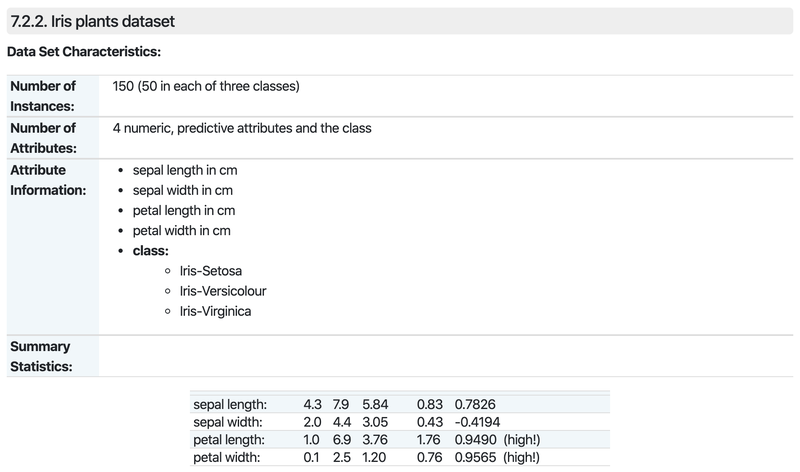

내용을 천천히 살펴봅시다. 데이터셋에는 총 150개의 데이터가 있다고 합니다. 각 데이터에는 4개의 정보가 담겨있다고 합니다.  

위에서 봤던 sepal, petal 각각의 길이와 폭, 총 네 가지의 정보를 담고 있는 것으로 보입니다. 카테고리를 나타내는 클래스는 앞서 설명한 대로 setosa, versicolour, virginica 세 가지가 있군요.  

데이터셋을 다루기 전에 이렇게 데이터셋의 정보를 먼저 확인하는 것은 중요합니다. 데이터를 얼마나 이해하고 있느냐는 그 데이터를 활용한 결과와 성능에 중대한 요소가 되기 때문이죠. 따라서 어떤 데이터셋을 다루든, 그 데이터셋이 담고 있는 정보를 먼저 잘 확인하고 시작하는 것을 권해드립니다.



## 1-3. Iris의 세 가지 품종, 분류해 볼까요? (2) 데이터 준비, 그리고 자세히 살펴보기는 기본!

그럼 이제 정말 데이터셋을 가져와 보도록 하겠습니다!<br>

소개해드린 scikit-learn의 예제 데이터셋은 다음과 같이 sklearn 라이브러리의 datasets 패키지 안에 있습니다.<br>

load_iris를 import 해와서 iris 데이터를 로딩해 보겠습니다.<br>

In [2]:
from sklearn.datasets import load_iris
# 사이킷 런 데이터셋에서 load_iris를 가져온다.
iris = load_iris()

print(dir(iris))
# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


잘 로딩이 되셨나요?

iris에는 어떤 정보들이 담겼을지, keys() 라는 메서드로 확인해 보겠습니다.



In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

네, iris에는 data, target, frame, target_names, DESCR, feature_names, filename 까지 총 7개의 정보가 담겨있군요.<br>


차근차근 하나씩 확인해 보겠습니다.,<br>

가장 중요한 데이터는 iris_data 변수에 저장한 후, 데이터의 크기를 확인해 보겠습니다.<br>

In [6]:
#iris.values()

In [8]:
iris_data = iris.data

print(iris_data.shape) 
#shape는 배열의 형상정보를 출력

(150, 4)


네, 위에서 확인했듯 총 150개의 데이터가 각각 4개의 정보를 담고 있는 것으로 보이는군요.

샘플로 하나의 데이터만 확인해 볼까요?

In [9]:
iris_data[0]

array([5.1, 3.5, 1.4, 0.2])

0번 index로 접근해서 확인해 보니, 총 네 개의 숫자가 나옵니다.

이는 위에서 확인했던 대로, 순서대로 sepal length, sepal width, petal length, petal width를 나타냅니다.

이쯤에서 우리가 풀려고 했던 문제를 다시 떠올려봅시다. 우리는 어떤 문제를 풀려고 했었죠?

따라서 머신러닝 모델에게 꽃잎, 꽃받침의 길이와 폭 정보를 입력했을 때, 붓꽃의 품종을 출력하도록 학습을 시켜야 하죠.<br>

여기서 이렇게 머신러닝 모델이 출력해야 하는 정답을 라벨(label) 또는 타겟(target) 이라고 합니다.<br>

붓꽃 데이터에서 타겟 정보는 다음과 같이 target으로 볼 수 있습니다.<br>

In [12]:
iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

네, iris 데이터의 target을 iris_label이라는 변수에 저장해 보았는데요.

길이와 형태를 확인하니 총 150개의 데이터가 들어있고, 각 값은 0, 1, 또는 2로 나타나는 것을 확인할 수 있습니다. 이 숫자들은 무엇을 나타내는 걸까요?

라벨의 이름은 다음과 같이 target_names에서 확인할 수 있습니다.

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

우리가 알고 있던 대로 setosa, versicolor, virginica 순서대로 담겨있군요.<br>
이 순서 그대로 0이라면 setosa, 1이라면 versicolor, 2라면 virginica를 나타냅니다.

나머지 남은 변수들도 한 번 확인해 보죠.

In [14]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

feature_names에는 다음과 같이 4개의 각 feature에 대한 설명이 담겨있습니다.

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

마지막으로 filename에는 데이터셋의 전체 이름을 보여주죠 iris데이터셋은 csv 형태의 파일로 되어있네요.

In [17]:
iris.filename

'iris.csv'

여기까지 데이터셋을 가져오고, 어떤 데이터셋인지 모두 샅샅이 살펴보았습니다.

이제부터 본격적인 실습을 시작해 보겠습니다!

## 1-4. 첫 번째 머신러닝 실습, 간단하고도 빠르게! <br>(1) 머신러닝 모델을 학습시키기 위한 문제지와 정답지 준비

pandas를 들어보셨나요?

판다스라고 불리는 이 라이브러리는 파이썬에서 표 형태로 이루어진 2차원 배열 데이터를 다루는 데에 가장 많이 쓰이는 도구입니다.<br>
표 데이터를 활용해서 데이터 분석을 하기도 하고, 대형 데이터의 여러 통계량을 다루는 것에도 최적화가 되어있죠.

iris 데이터 또한 행과 열이 있는 2차원 데이터이므로 우리도 pandas를 활용해서 다뤄볼 것입니다.

바로 사용해 보시죠.

In [19]:
import pandas as pd

print(pd.__version__)

1.3.3


pandas는 코드에서 굉장히 많이 쓰이기 때문에 pd라는 약어로 많이 사용합니다.

붓꽃 데이터셋을 pandas가 제공하는 DataFrame 이라는 자료형으로 변환해 보겠습니다.

In [21]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


DataFrame 을 만들면서 data에는 iris_data를 넣어주고, 각 컬럼에는 feature_names로 이름을 붙여주었습니다.<br>
한 가지 더, 정답 데이터도 함께 있다면 데이터를 다루기 더 편리하겠죠. label이라는 컬럼을 추가해주겠습니다.

In [25]:
iris_df["label"] = iris.target
#petal width(cm) 옆에 label이 생겼다.
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


네, ["label"] 이라는 코드로 라벨 컬럼을 추가해주었습니다. 아까 확인했던 대로 0~2 사이의 값들이 잘 들어간 것으로 보이네요.

여기서 4가지의 feature 데이터들은 바로 머신러닝 모델이 풀어야 하는 문제지와 같습니다.

예를 들어, [5.1, 3.5, 1.4, 0.2]라는 문제가 주어진다면 모델은 0, 즉 setosa라는 답을 맞혀야 하는 것이죠.

따라서 0, 1, 2와 같이 표현된 label 데이터는 머신러닝 모델에게 정답지라고 할 수 있습니다.

정리하자면 다음과 같습니다.

문제지 : 머신러닝 모델에게 입력되는 데이터. feature라고 부르기도 한다. 변수 이름으로는 X(대문자)를 많이 사용한다.<br>
정답지 : 머신러닝 모델이 맞혀야 하는 데이터. label 또는 target이라고 부르기도 한다. 변수 이름으로는 y를 많이 사용한다.

여기서 feature, label, target 과 같은 용어들을 잘 기억해두길 바랍니다! 머신러닝에서는 아주 많이 쓰이는 기본 용어이니까요 :)

그럼 이제 pandas를 활용한 데이터 확인까지 했으니 바로 모델을 학습시켜보겠습니다.

머신러닝 모델을 학습시키려면 한 가지 장치가 필요합니다. 바로 학습에 사용하는 training dataset과 모델의 성능을 평가하는 데 사용하는 test dataset으로 데이터셋을 나누는 작업이 필요하죠.

우리에게는 150개의 데이터가 있지만, 이 150개를 모두 학습시키는 데에 사용해버리면 학습이 완료된 모델의 성능을 공정하게 평가할 수 없기 때문입니다.

데이터셋을 분리하는 것은 scikit-learn이 제공하는 train_test_split 이라는 함수로 간단하게 할 수 있습니다.

sklearn.model_selection 패키지의 train_test_split을 활용하여, 다음과 같이 training dataset과 test dataset을 간단히 분리해 봅시다.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)
# 8:2 로 나누었다.
#random_state : 데이터 셔플
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  120 , X_test 개수:  30


train_test_split의 첫 번째 파라미터인 iris_data는 문제지, 즉 feature입니다.<br>
모델이 품종을 맞추기 위해 입력받는 특징 데이터이죠. iris 데이터셋에서는 4가지의 특징 정보가 있었습니다.

두 번째 파라미터인 iris_label은 모델이 맞추어야 하는 정답값, 즉 label입니다. 총 세 가지 품종이 있었죠.

이렇게 각 파라미터를 넣어줌으로써 우리는 학습용 데이터와 테스트용 데이터를 생성하며 각 데이터에서 4개의 feature 데이터만 있는 X,<br>
그리고 정답 label 데이터만 있는 y를 얻을 수 있습니다.

X 데이터셋을 머신러닝 모델에 입력하고, 그에 따라 모델이 내뱉는 품종 예측 결과를 정답인 y와 비교하며 점차 정답을 맞히도록 학습을 시킬 것입니다.

X와 y 뒤에 붙은 train과 test는 당연히 위에서 말했던 학습용 데이터와 테스트용 데이터를 뜻합니다.

X_train부터 y_test까지 만들어진 데이터셋을 확인해 볼까요?

In [32]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [33]:
X_test.shape, y_test.shape

((30, 4), (30,))

특히, y를 확인해 봅시다.

In [34]:
y_train, y_test

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

위에서 확인했던 label과는 다르게 0, 1, 2가 무작위로 섞여 있는 것을 확인할 수 있습니다.

train_test_split 함수가 train 데이터와 test 데이터에 각 품종 카테고리가 균일하게 잘 섞일 수 있도록 데이터셋을 만들어냈다는 뜻이기도 하죠.

이제 정말 머신러닝 모델을 학습시키기 위한 모든 준비가 끝났습니다. 어서 모델을 학습시켜보고 싶지 않으신가요?😆

## 1-5. 첫 번째 머신러닝 실습, 간단하고도 빠르게! (2) 첫 번째 머신러닝 모델 학습시키기

머신러닝은 크게 지도학습 (Supervised Learning), 비지도 학습 (Unsupervised Learning) 이라는 두 가지로 구분됩니다.
간단히 말해서 지도학습은 지도받을 수 있는, 즉 정답이 있는 문제에 대해 학습하는 것을 말하고, 반대로 비지도 학습은 정답이 없는 문제를 학습하는 것을 말합니다.

저희가 지금 해결하고자 하는 붓꽃 품종 문제는 어디에 해당할까요? 데이터에는 정답이 있었나요, 없었나요?

-> 지도학습. 붓꽃 품종에 대한 정답이 존재하기 때문이다.

네, 저희에게는 label이라는 정답지가 있었죠. 모델이 지도받을 수 있다는 이야기입니다. 즉, 붓꽃 품종 문제는 지도학습에 해당합니다.

지도학습은 다시 두 가지로 나눌 수 있는데, 바로 **분류(Classification) 와 회귀(Regression)** 입니다.<br>
분류는 입력받은 데이터를 특정 카테고리 중 하나로 분류해내는 문제를, 회귀는 입력받은 데이터에 따라 특정 필드의 수치를 맞히는 문제를 말합니다.

다시 한번 또 고민해 보죠. 붓꽃 품종 문제는 분류 문제인가요, 회귀 문제인가요?

분류입니다.

그렇다면 회귀 문제는 어떤 것이 있을까요?<br>
예를 들어, 집에 대한 정보(평수, 위치, 층수 등)를 입력받아 그 집의 가격을 맞히는 문제는 회귀 문제에 해당합니다.<br>
카테고리를 분류하는 것이 아니라, 실제 값의 수치를 어림해서 맞히는 거죠.

분류 : 환자의 나이, 병력, 혈당 등을 입력받아 암의 양성/음성을 판정하는 문제<br>
회귀 : 택시를 탄 시각, 내린 시각, 출발지, 도착지, 거리 등을 입력받아 택시 요금을 맞히는 문제

그러면 여기까지 정리가 되었으니 우리는 무슨 머신러닝 모델을 써야할지 명확해집니다. 지도학습 중에서도 분류를 할 수 있는 모델을 사용하면 되죠.

분류 모델은 아주 다양하지만, 그 중 저희는 첫 번째로 Decision Tree 모델을 사용해 보도록 하겠습니다.
Decision Tree는 직관적이면서도 간단하게 사용할 수 있어 분류 문제를 풀 때 가장 기본적으로 쓰이는 모델 중 하나입니다.

Decision Tree의 알고리즘을 설명하는 다음 글을 한번 읽어보죠. 비교적 수학적인 내용이 많아서 쉽지 않을 수 있지만, 이해가 잘 안 가더라도 편하게 읽어보세요.

의사결정나무는 구분 뒤 각 영역의 순도(homogeneity)가 증가/불확실성(엔트로피)가 최대한 감소하도록 하는 방향으로 학습을 진행합니다.

엔트로피가 낮아지면 의사결정나무는 그 기점으로 두개로 나눈다.

의사결정나무 모델 학습의 또다른 축은 가지치기(pruning)입니다.   
모든 terminal node의 순도가 100%인 상태를 Full tree라고 하는데요.  
이렇게 Full tree를 생성한 뒤 적절한 수준에서 terminal node를 결합해주어야 합니다.  
왜냐하면 분기가 너무 많아서 학습데이터에 과적합(overfitting)할 염려가 생기기 때문입니다.

의사결정나무의 분기 수가 증가할 때 처음에는 새로운 데이터에 대한 오분류율이 감소하나 일정 수준 이상이 되면 오분류율이 되레 증가하는 현상이 발생한다고 합니다.   
이러한 문제를 해결하기 위해서는 검증데이터에 대한 오분류율이 증가하는 시점에서 적절히 가지치기를 수행해줘야 합니다.  


마치 나뭇가지를 잘라내는 것과 같다는 의미에서 이러한 용어가 붙었습니다.  
매우 직관적이죠. 가지치기 개념도는 아래와 같습니다.   
다만 가지치기는 데이터를 버리는 개념이 아니고 분기를 합치는(merge) 개념으로 이해해야 합니다.

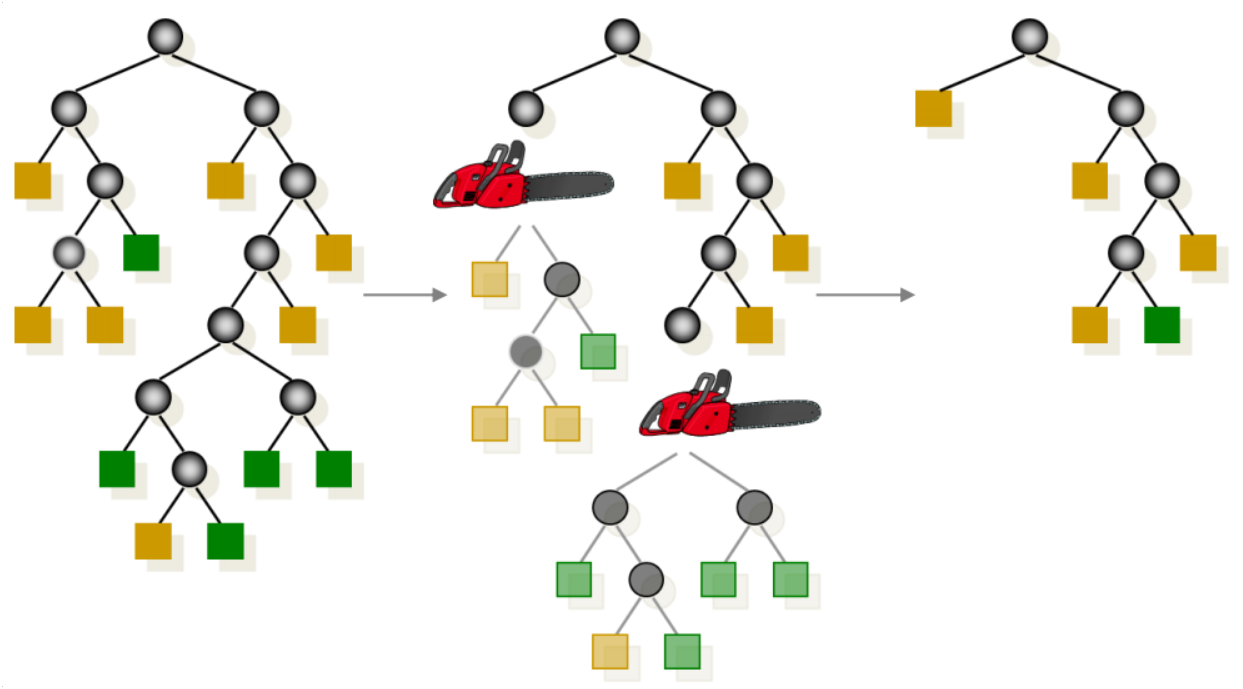

이상으로 의사결정나무에 대해 살펴보았습니다.<br>
의사결정나무는 계산복잡성 대비 높은 예측 성능을 내는 것으로 정평이 나 있습니다.<br>
아울러 변수 단위로 설명력을 지닌다는 강점을 가지고 있습니다.<br>
다만 의사결정나무는 결정경계(decision boundary)가 데이터 축에 수직이어서 특정 데이터에만 잘 작동할 가능성이 높습니다.

이같은 문제를 극복하기 위해 등장한 모델이 바로 **랜덤포레스트**인데요, 같은 데이터에 대해 의사결정나무를 여러 개 만들어 그 결과를 종합해 예측 성능을 높이는 기법입니다.

Decision Tree는 sklearn.tree 패키지 안에 DecisionTreeClassifier 라는 이름으로 내장되어 있습니다.  
모델을 import해서 가져오고, decision_tree 라는 변수에 모델을 저장해 보겠습니다.

In [37]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


자, 그러면 모델은 어떻게 학습시킬까요?

놀라지 마세요. 지금까지 길게 거쳐온 과정이 무색하게, 모델 학습은 아주 간단하답니다.  
물론 이 간단함은 scikit-learn이 모델 학습을 편리하게 할 수 있도록 설계한 API 구조 덕이기도 합니다.

모델 학습은 우리가 준비해 둔 X_train 와 y_train 데이터로, 다음 한 줄이면 완료됩니다.



In [40]:
decision_tree.fit(X_train, y_train)
#fit : 학습 명령어

DecisionTreeClassifier(random_state=32)

여기서 눈여겨 볼 점은 학습하는 메서드의 이름이 fit이라는 점입니다.<br>
training dataset 으로 모델을 학습시킨다는 것은, **달리 말하면 training dataset에 맞게 모델을 fitting, 즉 맞추는 것이라고 할 수 있습니다.<br>**
training dataset에 있는 **데이터들을 통해 어떠한 패턴을 파악하고, 그 패턴에 맞게 예측을 할 수 있도록 학습되기 때문입니다.**

즉, 다른 말로 하면 모델은 training dataset에 존재하지 않는 데이터에 대해서는 정확한 정답 카테고리가 무엇인지 알지 못합니다.  
다만 training dataset을 통해 학습한 패턴으로 새로운 데이터가 어떤 카테고리에 속할지 예측할 뿐이죠.

그렇기 때문에 새로운 데이터에 대해서도 잘 맞출 수 있기 위해서는 training dataset이 어떻게 구성되어 있는지가 매우 중요합니다.<br>
더 다양한, 더 일반화 된 데이터로 학습이 될수록 새로운 데이터에 대해서도 잘 맞출 수 있는 것이죠.

## 1-6. 첫 번째 머신러닝 실습, 간단하고도 빠르게! (3) 첫 번째 머신러닝 모델 평가하기

자, 그러면 학습이 완료되었으니 test 데이터로 예측해 보겠습니다!



In [42]:
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

X_test 데이터에는 정답인 label이 없고 feature 데이터만 존재했습니다.<br>
따라서 학습이 완료된 decision_tree 모델에 X_test 데이터로 predict를 실행하면 모델이 예측한 y_pred을 얻게 됩니다.

모델은 총 30개의 데이터에 대해 [2, 1, ...] 라는 예측 결과를 내놓았군요. 실제 정답인 y_test와 비교해서 얼마나 맞았는지 확인해봅시다.



In [43]:
y_test

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 1, 1, 2, 2])

눈으로 간단히 비교해 봤을 때는 어느정도 잘 맞은 것 같지 않나요?

예측한 결과에 대한 수치를 조금 더 편리하게 확인할 수 있는 방법이 있습니다. scikit-learn에서 성능 평가에 대한 함수들이 모여있는 sklearn.metrics 패키지를 이용하면 되죠.

성능을 평가하는 방법에도 다양한 척도가 있는데, 그 중 정확도(Accuracy) 를 간단히 확인해 보겠습니다.

In [44]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

90 % 맞았다는 말...

약 0.9이라는 수치가 나왔군요. 이는 90% 정도의 정확도를 보인다는 뜻입니다.

정확도는 전체 개수 중 맞은 것의 개수 의 수치를 나타냅니다. 다음과 같은 식으로 나타낼 수 있죠.

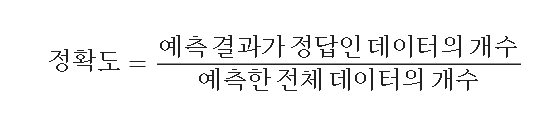

우리의 모델은 30개의 데이터에 대해 예측을 했으니, 그 중 맞은 것은 30 * 0.9 = 27 개라는 것을 역추적해 볼 수 있습니다.<br>
즉 30개 중 27개는 옳은 카테고리로, 3개는 틀린 카테고리로 분류를 했나봅니다.

90%의 정확도로 붓꽃의 품종을 잘 판단한다니, 아주 빠르게 학습시켜본 것에 비하면 꽤나 좋은 결과인 것 같지 않나요?!